# PyTorch Tutorial

## Tensors
- Tensors are a data structure similar to arrays and matrices, in torch we use them to encode the inputs and outputs of a model, as well as the model's parameters
- They are similar to ndarrays, but can run on GPUs, and are optimised for automatic differentiation

In [5]:
import torch
import numpy as np

#### Initialisation

We can initialise tensors in various ways, directly from data:

In [6]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

From a NumPy array

In [7]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

From another tensor

In [8]:
x_ones = torch.ones_like(x_data)
print(f'Ones Tensor: \n {x_ones} \n')
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f'Random Tensor: \n {x_rand} \n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8675, 0.0294],
        [0.6526, 0.8325]]) 



With random or constant values

In [9]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4370, 0.6806, 0.6390],
        [0.0318, 0.1165, 0.2434]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Attributes

In [10]:
tensor = torch.rand(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Operations

By default, tensors are created on the CPU, we can move them to the GPU if cuda is available on the system

In [11]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print('Tensor moved to GPU')
else:
    print('No GPU available, tensor remains on CPU')

print(f'Device tensor is stored on: {tensor.device}')

Tensor moved to GPU
Device tensor is stored on: cuda:0


Standard numpy-like operations apply

In [12]:
print(f'First row: {tensor[0]}')
print(f'First column: {tensor[:, 0]}')
tensor[:, 1] = 0
print(tensor)

First row: tensor([0.9383, 0.3193, 0.8915, 0.8530], device='cuda:0')
First column: tensor([0.9383, 0.5210, 0.4961], device='cuda:0')
tensor([[0.9383, 0.0000, 0.8915, 0.8530],
        [0.5210, 0.0000, 0.7148, 0.7246],
        [0.4961, 0.0000, 0.5550, 0.5603]], device='cuda:0')


We can join tensors using `torch.cat`

In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.9383, 0.0000, 0.8915, 0.8530, 0.9383, 0.0000, 0.8915, 0.8530, 0.9383,
         0.0000, 0.8915, 0.8530],
        [0.5210, 0.0000, 0.7148, 0.7246, 0.5210, 0.0000, 0.7148, 0.7246, 0.5210,
         0.0000, 0.7148, 0.7246],
        [0.4961, 0.0000, 0.5550, 0.5603, 0.4961, 0.0000, 0.5550, 0.5603, 0.4961,
         0.0000, 0.5550, 0.5603]], device='cuda:0')


We can apply arithmetic operations, such as matrix multiplication

In [14]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(f'y1: {y1}')
print(f'y2: {y2}')
print(f'y2: {y3}')

y1: tensor([[2.4029, 1.7442, 1.4382],
        [1.7442, 1.3075, 1.0612],
        [1.4382, 1.0612, 0.8680]], device='cuda:0')
y2: tensor([[2.4029, 1.7442, 1.4382],
        [1.7442, 1.3075, 1.0612],
        [1.4382, 1.0612, 0.8680]], device='cuda:0')
y2: tensor([[2.4029, 1.7442, 1.4382],
        [1.7442, 1.3075, 1.0612],
        [1.4382, 1.0612, 0.8680]], device='cuda:0')


element-wise multiplication

In [15]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(f'z1: {z1}')
print(f'z2: {z2}')
print(f'z3: {z3}')

z1: tensor([[0.8804, 0.0000, 0.7948, 0.7276],
        [0.2715, 0.0000, 0.5109, 0.5251],
        [0.2461, 0.0000, 0.3080, 0.3139]], device='cuda:0')
z2: tensor([[0.8804, 0.0000, 0.7948, 0.7276],
        [0.2715, 0.0000, 0.5109, 0.5251],
        [0.2461, 0.0000, 0.3080, 0.3139]], device='cuda:0')
z3: tensor([[0.8804, 0.0000, 0.7948, 0.7276],
        [0.2715, 0.0000, 0.5109, 0.5251],
        [0.2461, 0.0000, 0.3080, 0.3139]], device='cuda:0')


A single-element tensor can be converted into a python numerical value using `item()`

In [16]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

6.254637718200684 <class 'float'>


In-place operations are operations that store the result into the operand, and are denoted by a `_` suffix

In [17]:
print(f'{tensor} \n')
tensor.add_(5)
print(tensor)

tensor([[0.9383, 0.0000, 0.8915, 0.8530],
        [0.5210, 0.0000, 0.7148, 0.7246],
        [0.4961, 0.0000, 0.5550, 0.5603]], device='cuda:0') 

tensor([[5.9383, 5.0000, 5.8915, 5.8530],
        [5.5210, 5.0000, 5.7148, 5.7246],
        [5.4961, 5.0000, 5.5550, 5.5603]], device='cuda:0')


In place operations save some memory, but can be problematic when computing derivatives beacuse of an immediate loss of history, so better not to use them.

## Datasets and Dataloaders
We want our dataset code to be decoupled from our model training code for better readability and modularity.

PyTorch provides two data primitives, `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. 

`Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

### Loading a Dataset

We will use the `Fashion-MNIST` dataset from TorchVision as an example. 

In [18]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [19]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualising the Dataset

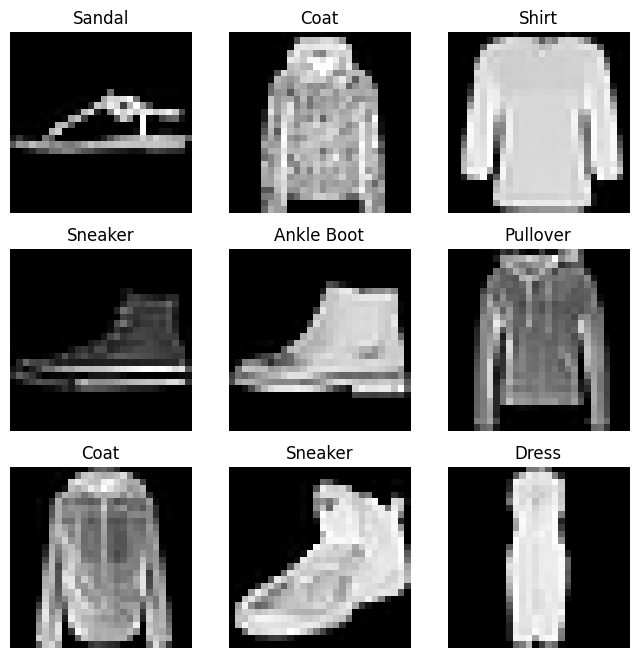

In [24]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
    
plt.show()

### Creating a custom dataset for your files

A custom Dataset class must implement three functions, `__init__`, `__len__`, and `__getitem__`.

In [25]:
import os
import pandas as pd
from torchvision.io import read_image

In [26]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label